In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# 2 Collider Experiments

### Get the simulation working. Process all 1000 input events. [1 mark]
A picture of the simulation has been included in the folder (Sim1000.png)

Now to read in the data for the next questions:

In [2]:
truthData = pd.read_csv( "particle_data/output_nt_Truth.csv", comment="#", \
names=[ "EventID", "Phi", "Theta", "Momentum" ] )
tracker1Data = pd.read_csv( "particle_data/output_nt_Tracker1.csv", comment="#", \
names=[ "EventID", "Phi", "Theta" ] )
tracker2Data = pd.read_csv( "particle_data/output_nt_Tracker2.csv", comment="#", \
names=[ "EventID", "Phi", "Theta" ] )

In [3]:
truthData

,EventID,Phi,Theta,Momentum
0,0,-0.063847,2.422340,45.2024
1,0,3.077680,0.719255,45.4999
2,1,0.702142,2.213210,45.4999
3,1,-2.439450,0.928381,45.4999
4,2,1.446030,0.929328,45.4999
...,...,...,...,...
1995,997,2.300160,1.147010,45.1561
1996,998,-2.633190,1.805450,42.1890
1997,998,0.429832,1.352430,44.6172
1998,999,-1.417030,1.447320,45.0538


In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(tracker1Data)
    
# Here you can see that after 5, there are no particles until event 12

,EventID,Phi,Theta
0,1,-2.447670,0.928358
1,1,0.710358,2.213220
2,2,-1.703770,2.212250
3,2,1.454290,0.929340
4,3,0.335390,2.182440
5,3,-2.790080,0.959136
6,4,0.710495,2.043770
7,4,-2.416360,1.098010
8,4,-2.416360,1.098010
9,4,-2.416230,1.098020


In [5]:
tracker2Data

,EventID,Phi,Theta
0,0,-2.066390,2.334350
1,1,-2.455900,0.928325
2,1,0.718557,2.213250
3,1,0.718558,2.213250
4,1,0.718534,2.213250
...,...,...,...
3233,997,-0.875075,2.025630
3234,998,0.443603,1.352440
3235,998,-2.647820,1.805460
3236,999,1.627990,1.771620


### Using the event ID, print the number of true particles, layer one hits, and layer two hits in each event. [1 mark]

To take the number of true particles, we count the number of rows in truthData. 

In [6]:
# Finding number of unique particles in truthdata
truthData['EventID'].size

2000

2000 across 1000 events, so 2 per event.

To find layer one and two hits in each event, we count the number of hits for each eventID in the two datasets (tracker1Data and tracker2Data) as shown below:

Layer one hits per event in table format:

In [7]:
# Find number of layer one hits in each event
hits1 = tracker1Data.groupby(['EventID']).size().reset_index(name='Hits')

#hits = tracker1Data['EventID'].value_counts()

# Display full list (Its long!)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(hits1)

# Displaying eventID and number of hits

,EventID,Hits
0,1,2
1,2,2
2,3,2
3,4,34
4,5,2
5,6,20
6,13,13
7,14,2
8,17,2
9,18,2


Layer two hits per event in table format:

In [8]:
# Find number of layer two hits in each event
hits2 = tracker2Data.groupby(['EventID']).size().reset_index(name='Hits')



# Display full list (Its long!)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(hits2)

# Displaying eventID and number of hits

,EventID,Hits
0,0,1
1,1,7
2,2,2
3,3,6
4,4,2
5,5,2
6,6,8
7,13,15
8,14,2
9,17,2


EventIDs that are excluded from this list are due to them having no true particles within them, and therefore having a count of zero.


# 3 Track reconstruction

### For each event, find all pairs of hits between layer 1 and layer 2. [1 mark]

### For each pair of tracker hits, assume they come from a single particle and calcuate its momentum. [1 mark]

### Find the momentum resolution of our experiment. Plot a 1D histogram to show the distribution for all reconstructed particles. [1 mark]

Next, find all pairs of hits between layer 1 and layer 2.

Then, calculate the momentum of the singular particles formed by these pairs (which is the next mark) and collect them into a list.

Once we've done that, we compare the pair to their true particle momenta values, and collect the distribution of $\frac{p_{reconstructed} - p_{true}}{p_{true}}$. We'll use this after this block of code to determine the resolution and plot a 1D histogram

(This is a collection of multiple marked questions into one block of code)

## WARNING, THIS IS A BIT SLOW
I've dumped most of the relevant operations in here, not too efficiently applied either, so this component of the code does all the heavy lifting.

In [9]:
# create list for number of pairs per event
event_no_list = []
mom_list = []
distribution_list = []
index_list = []
total_mom_list = []
#mass_dist_index_list = []

dist = 0

# Relevant variables
B = 0.5 # Tesla
# Radii of the two trackers
R1 = 4 # Metres
R2 = 8 # Metres

pair_no = 0

# Loop across full layer1 data list
for i in range(len(tracker1Data['EventID'])):
    
    # Check if new loop is no longer on same event ID, if so, save number of pairs (ignore first iteration)
    if (i != 0):
        if (tracker1Data['EventID'][i] != tracker1Data['EventID'][i-1]):
            
            print("Number of pairs in event {:.2f}: {:.2f}".format(tracker1Data['EventID'][i-1], pair_no))
            
            # if the number of pairs is two, save them as they will be used in part 4
            if (pair_no == 2):
                # take last two momenta values produced by the below function, these will be the momenta from the two pairs
                total_mom_list.append(mom_list[-2:])
                
                #mass_dist_index_list.append((index_list[-3:])[:2])
            pair_no = 0
    
    # Loop across full layer2 data list
    for j in range(len(tracker2Data['EventID'])):
        
        # Only check for pairs when eventID of j is same as i
        if (tracker2Data['EventID'][j] == tracker1Data['EventID'][i]):
            
            # Check for pairing and do further calculations
            if (math.fabs(tracker1Data['Theta'][i] - tracker2Data['Theta'][j]) < 0.0001):
                pair_no += 1
                
                index_list.append([i,j])
                # MOMENTUM CALCULATION
                
                deltaPhi = math.fabs(tracker1Data['Phi'][i]-tracker2Data['Phi'][j])
                sagitta = math.sin(deltaPhi) * R1
                # Simplified R as total path is given as L=8, and denominator is 8*sagitta.
                R = (8)/(sagitta)
                # Calculte and append momentum to list
                mom = (0.3 * B * R)/np.sin(tracker1Data['Theta'][i])
                mom_list.append(mom)

                
                # MOMENTUM DISTRIBUTION
                
                # Collect distribution of our predicted momenta against true momenta
                # ev_ID*2 is a bit of a trick to get the correct truth data index from the EventID given by tracker1Data

                # Need to check which true value to use, so compare thetas of true particles against layer 1 hits to find which one to use.
                
                ev_ID = tracker1Data['EventID'][i]
                
                if (math.fabs(truthData['Theta'][ev_ID*2] - tracker1Data['Theta'][i]) < 0.0001):
                    dist = (mom - truthData['Momentum'][ev_ID*2])/truthData['Momentum'][ev_ID*2]
                    distribution_list.append(dist)
                elif (math.fabs(tracker1Data['Theta'][(ev_ID*2)+1] - tracker1Data['Theta'][i]) < 0.0001):
                    dist = (mom - truthData['Momentum'][(ev_ID*2)+1])/truthData['Momentum'][(ev_ID*2)+1]
                    distribution_list.append(dist)
                else:
                    continue
                

                
                
                
        # If tracker2data event array has increased larger than tracker1data event array
        # break j loop as no more pairs will be found
        elif (tracker2Data['EventID'][j] > tracker1Data['EventID'][i]):
            break;


Number of pairs in event 1.00: 7.00
Number of pairs in event 2.00: 2.00
Number of pairs in event 3.00: 6.00
Number of pairs in event 4.00: 4.00
Number of pairs in event 5.00: 2.00
Number of pairs in event 6.00: 11.00
Number of pairs in event 13.00: 2.00
Number of pairs in event 14.00: 2.00
Number of pairs in event 17.00: 2.00
Number of pairs in event 18.00: 2.00
Number of pairs in event 20.00: 2.00
Number of pairs in event 23.00: 2.00
Number of pairs in event 24.00: 2.00
Number of pairs in event 25.00: 1.00
Number of pairs in event 26.00: 1.00
Number of pairs in event 27.00: 2.00
Number of pairs in event 30.00: 2.00
Number of pairs in event 32.00: 8.00
Number of pairs in event 33.00: 6.00
Number of pairs in event 34.00: 7.00
Number of pairs in event 35.00: 2.00
Number of pairs in event 37.00: 5.00
Number of pairs in event 38.00: 2.00
Number of pairs in event 40.00: 2.00
Number of pairs in event 41.00: 2.00
Number of pairs in event 42.00: 2.00
Number of pairs in event 44.00: 2.00
Number

Number of pairs in event 362.00: 2.00
Number of pairs in event 363.00: 2.00
Number of pairs in event 364.00: 5.00
Number of pairs in event 365.00: 2.00
Number of pairs in event 371.00: 3.00
Number of pairs in event 372.00: 7.00
Number of pairs in event 374.00: 2.00
Number of pairs in event 375.00: 10.00
Number of pairs in event 376.00: 2.00
Number of pairs in event 377.00: 2.00
Number of pairs in event 379.00: 2.00
Number of pairs in event 380.00: 2.00
Number of pairs in event 381.00: 2.00
Number of pairs in event 382.00: 2.00
Number of pairs in event 384.00: 2.00
Number of pairs in event 388.00: 2.00
Number of pairs in event 389.00: 2.00
Number of pairs in event 390.00: 2.00
Number of pairs in event 391.00: 2.00
Number of pairs in event 392.00: 2.00
Number of pairs in event 396.00: 12.00
Number of pairs in event 397.00: 7.00
Number of pairs in event 398.00: 2.00
Number of pairs in event 399.00: 2.00
Number of pairs in event 402.00: 4.00
Number of pairs in event 403.00: 8.00
Number of 

Number of pairs in event 732.00: 2.00
Number of pairs in event 733.00: 2.00
Number of pairs in event 736.00: 2.00
Number of pairs in event 740.00: 6.00
Number of pairs in event 741.00: 9.00
Number of pairs in event 742.00: 2.00
Number of pairs in event 743.00: 7.00
Number of pairs in event 746.00: 5.00
Number of pairs in event 747.00: 2.00
Number of pairs in event 749.00: 5.00
Number of pairs in event 750.00: 2.00
Number of pairs in event 751.00: 2.00
Number of pairs in event 752.00: 2.00
Number of pairs in event 753.00: 2.00
Number of pairs in event 754.00: 9.00
Number of pairs in event 756.00: 19.00
Number of pairs in event 757.00: 2.00
Number of pairs in event 758.00: 11.00
Number of pairs in event 762.00: 2.00
Number of pairs in event 763.00: 2.00
Number of pairs in event 764.00: 8.00
Number of pairs in event 769.00: 2.00
Number of pairs in event 770.00: 2.00
Number of pairs in event 771.00: 9.00
Number of pairs in event 773.00: 4.00
Number of pairs in event 774.00: 7.00
Number of 

Now here are all the momenta values for our singular particles. To see them all change index of mom_list in print

In [10]:
print("First 10 momenta values for pairs of tracker hits: ")
print(mom_list[:10])
print("")
print("Total number of momenta values:")
print(len(mom_list))

First 10 momenta values for pairs of tracker hits: 
[45.52925541920648, 45.700894182409385, 45.695321027524365, 45.82945301872997, 45.924940622494724, 45.936200625358076, 45.90806096504488, 45.49575364326456, 45.22111666867599, 45.4466312586516]

Total number of momenta values:
2692


Which if we compare to the true momenta values are pretty close to the expected values.
There are more momenta values than true particles due to a number of factors. Most likely being the creation of multiple particles beyond the true ones, possible double counting or including particle pairs that weren't actually paired.

Plot a histogram of the distribution of predicted against true momenta and determine resolution.

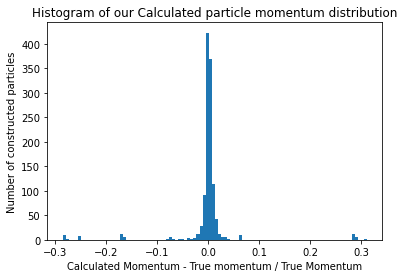

In [11]:
hist = plt.hist(distribution_list, bins = 100)
plt.xlabel("Calculated Momentum - True momentum / True Momentum")
plt.ylabel("Number of constructed particles")
plt.title("Histogram of our Calculated particle momentum distribution")
plt.show()

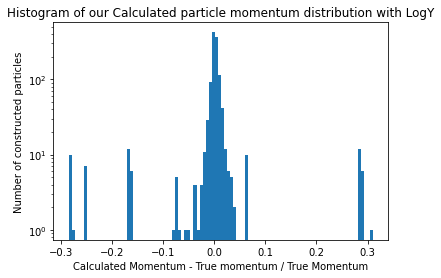

In [12]:
# log plot for good measure
log_hist = plt.hist(distribution_list, bins = 100, log = True)
plt.xlabel("Calculated Momentum - True momentum / True Momentum")
plt.ylabel("Number of constructed particles")
plt.title("Histogram of our Calculated particle momentum distribution with LogY")
plt.show()

In [13]:
# Calculate resolution
dist_list = np.asarray(distribution_list)
resolution = np.std(dist_list)
print("Momentum resolution: {:.4f}".format(resolution)) # It's not in GeV because units are cancelled out...right?

Momentum resolution: 0.0548


# 4 Physics Analysis

### Plot the total mass distribution. What was the original particle? Compare your results to the PDG values for mass and width. [1 mark]

We're discarding any events that have more or less than 2 reconstructed particles. So hits must be equal to 2 for layer 1 and 2 of our detector. This narrows down our results significantly. We then just collect the last two momenta values and add them together to get total mass of reconstructed particle, as we're assumed M = E/c^2, where C = 1 and E = P.

In [14]:
# Demonstrating basic indexing
print(total_mom_list[0], total_mom_list[0][0] + total_mom_list[0][1])
# Add the two components of each list up, absolute due to negative momenta values somewhere
total_mass = [(abs(total_mom_list[i][0]) + abs(total_mom_list[i][1])) for i in range(len(total_mom_list))]
print(total_mass[0])

[45.49575364326456, 45.22111666867599] 90.71687031194054
90.71687031194054


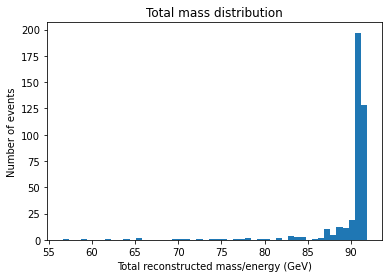

In [15]:
# Plot total mass distribution
hist = plt.hist(total_mass, bins = 50)
plt.xlabel("Total reconstructed mass/energy (GeV)")
plt.ylabel("Number of events")
plt.title("Total mass distribution")
plt.show()

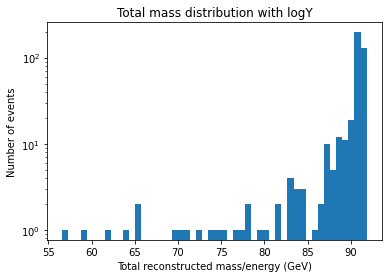

In [16]:
# log plot for good measure
log_hist = plt.hist(total_mass, bins = 50, log = True)
plt.xlabel("Total reconstructed mass/energy (GeV)")
plt.ylabel("Number of events")
plt.title("Total mass distribution with logY")
plt.show()

In [17]:
# Calculate mean and stdev of mass
mas_list = np.asarray(total_mass)
mmean = np.mean(mas_list)
mres = np.std(mas_list)
print("Mass (error): {:.4f} ({:.4f}) GeV".format(mmean, mres))

Mass (error): 89.6227 (4.5888) GeV


Looking at the PDG it would make sense to therefore be the Z bozon, with mass m= 91.1876±0.0021 GeV. Our values are a bit off, due to the lack of a true gaussian 'peak' around 90, but we get the result to within 1 sigma (mostly due to very large sigma) of the true value from PDG.